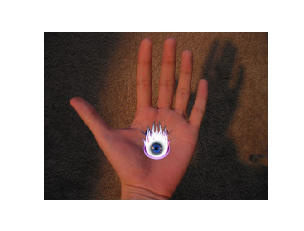

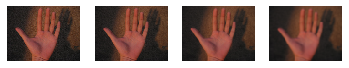

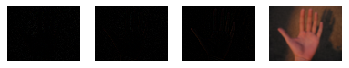

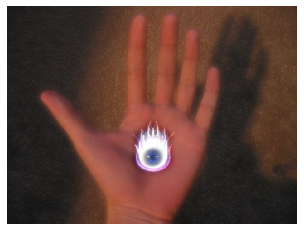

In [2]:

import os
import math
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

import utils



def gaussian_pyramid(input_image, level):
    
    G = []
    G.append(input_image)
    for i in range(level):                 
        G.append(utils.down_sampling(G[i]))
        
    return G


def laplacian_pyramid(gaussian_pyramid):
    
    L = []
    G = gaussian_pyramid
    level = len(G)-1
    
    for i in range(level):
        expand = utils.up_sampling(G[i+1])
        L.append(utils.safe_subtract(G[i],expand))
        
    L.append(G[level])    
    
    return L



def blend_images(image1, image2, mask, level):
      
    G_A, G_B, G_m = gaussian_pyramid(image1, level), gaussian_pyramid(image2, level), gaussian_pyramid(mask, level)    
    L_A, L_B = laplacian_pyramid(G_A), laplacian_pyramid(G_B)
        
    #combining Laplacian pyramid
    G_combined = []
    for i in range(level):
        masked = utils.safe_subtract(L_A[i], G_m[i])
        G_combined.append(utils.safe_add(masked,L_B[i]))
    
    #Adding low resolution images
    temp = utils.safe_subtract(utils.up_sampling(G_A[level]),utils.up_sampling(G_m[level]))
    blended = utils.safe_add(utils.safe_add(temp,utils.up_sampling(G_B[level])),G_combined[level-1])  
    
    #upsampling
    for i in range(1,level):
        blended = utils.up_sampling(blended)
        blended = utils.safe_add(blended, G_combined[level-1-i])
    
    return blended


if __name__ == '__main__':
    hand = np.asarray(Image.open(os.path.join('images', 'hand.jpeg')).convert('RGB'))
    flame = np.asarray(Image.open(os.path.join('images', 'flame.jpeg')).convert('RGB'))
    mask = np.asarray(Image.open(os.path.join('images', 'mask.jpeg')).convert('RGB'))

    logdir = os.path.join('results', 'HW1_2')
    if not os.path.exists(logdir):
        os.makedirs(logdir)

    level = 3


    plt.figure()
    plt.imshow(Image.open(os.path.join('images', 'direct_concat.jpeg')))
    plt.axis('off')
    plt.savefig(os.path.join(logdir, 'direct.jpeg'))
    plt.show()

    ret = gaussian_pyramid(hand, level)
    if ret is not None:
        plt.figure()
        for i in range(len(ret)):
            plt.subplot(1, len(ret), i + 1)
            plt.imshow(ret[i].astype(np.uint8))
            plt.axis('off')
        plt.savefig(os.path.join(logdir, 'gaussian_pyramid.jpeg'))
        plt.show()

    ret = laplacian_pyramid(ret)
    if ret is not None:
        plt.figure()
        for i in range(len(ret)):
            plt.subplot(1, len(ret), i + 1)
            plt.imshow(ret[i].astype(np.uint8))
            plt.axis('off')
        plt.savefig(os.path.join(logdir, 'laplacian_pyramid.jpeg'))
        plt.show()

    ret = blend_images(hand, flame, mask, level)
    if ret is not None:
        plt.figure()
        plt.imshow(ret.astype(np.uint8))
        plt.axis('off')
        plt.savefig(os.path.join(logdir, 'blended.jpeg'))
        plt.show()

